## Summary
### Numerical
The numerical categories are largely usable as they are, with the sole exception of blood pressure, but a solution for this can be found in the notebook.

None of the categories align closely enough with the normal distribution for the null hypothesis to be upheld using the Shapiro-Wilk test.
There are peculiarities with the quality of sleep, stress level, and physical activity level where they seem to be spaced out (possibly due to issues with the questions asked). The same sporadic pattern is observed in blood pressure and steps, which needs further explanation and might have impacted the normality test.
By using box plots and calculating means for individuals with and without sleep disorders, we find that the means do differ, though the significance of these differences has not been tested.<br>
### Categorical
The categorical parameters are also well-structured, with the only tweak being the consolidation of occupations with a low sample size into an unknown level.

Using the ANOVA test to assess the significance on sleep duration, we find all categorical parameters to be significant.
By employing a stacked bar plot, we find that specifically occupation and weight are quite "skewed", with almost all instances of disorders falling into one level. This will be discussed in the problems section.

## Problems
### Selection Bias
My findings in the categorical parameters suggest that 90% of nurses have some sleep disorder while doctors and engineers have barely any disorders. This discrepancy hints at some selection bias in the data, which might also explain why none of the numerical values come from a normal distribution. There are also extreme differences between obese and normal BMI categories, a disparity that might not intuitively be this large.

### Self-Assessment Bias
If the target group has been asked to rate themselves on their stress levels, their assessments could introduce bias. For instance, there are instances where cancer patients rate their diet as worse than non-cancer patients, despite having the same diet. The same issue could arise with self-assessment of physical activity levels. This could completely undermine any predictability of disorders.

### Correlation
Concerning selection bias, any conclusions drawn about individuals with sleep disorders could equally be interpreted as observations about overweight individuals. This, along with the correlation to occupation, reduces the explanatory power of our analysis.

### Conclusion
I hope you found this analysis helpful. The dataset is excellent in quality, but certain considerations need to be made. I recommend comparing this data with similar datasets to pinpoint potential biases, or even complementing it with another dataset to enhance the analysis. Furthermore, the data collection method piques my interest due to the potential biases hinted at in the analysis.

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Je télécharge la data depuis kaggle via l'API

In [2]:
HOME = ""
with zipfile.ZipFile(r'.././data/01_raw/sleep-health-and-lifestyle-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(r'.././data/01_raw/')

In [18]:
df = pd.read_csv(r'.././data/01_raw//Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


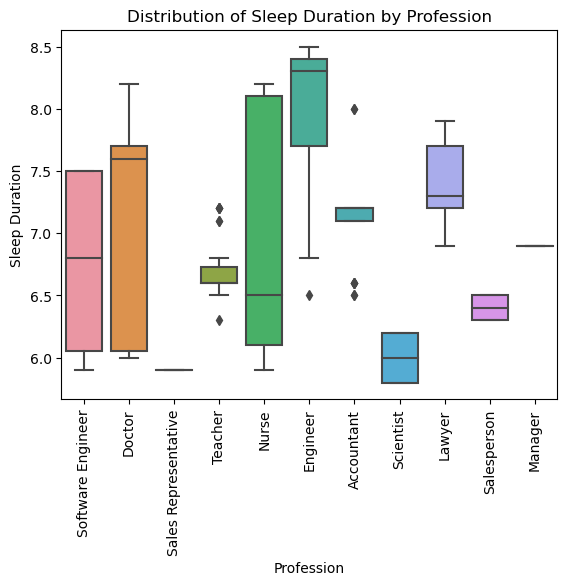

In [19]:
# Create a boxplot to visualize the distribution of sleep duration by profession
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title to the plot
plt.xlabel('Profession')
plt.ylabel('Sleep Duration')
plt.title('Distribution of Sleep Duration by Profession')

# Display the plot
plt.show()

In [20]:
missing_data = df.isna().sum()
missing_data_df = pd.DataFrame(missing_data).reset_index()
missing_data_df.columns = ['Column', 'Missing']
missing_data_df

,Column,Missing
0,Person ID,0
1,Gender,0
2,Age,0
3,Occupation,0
4,Sleep Duration,0
5,Quality of Sleep,0
6,Physical Activity Level,0
7,Stress Level,0
8,BMI Category,0
9,Blood Pressure,0


In [28]:
df["High_pressure"] = 0
df["Low_pressure"] = 0

for i, val in enumerate(df["Blood Pressure"]):
    j = 0
    
    while val[j] != "/":
        j += 1
        continue
        
    df.loc[i, "High_pressure"] = int(val[:j])
    df.loc[i, "Low_pressure"] = int(val[(j+1):])

df.drop("Blood Pressure", axis=1, inplace=True)
print("Successfully created numeric categories Low_pressure and high_pressure, droped Blood pressure")

Successfully created numeric categories Low_pressure and high_pressure, droped Blood pressure


In [29]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High_pressure,Low_pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [25]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'High_pressure', 'Low_pressure'],
      dtype='object')

In [32]:
import pandas as pd 
import openpyxl 

PATH_TO_INTERMEDIATE_XLSX = r"../data/02_intermediate/df_cleaned.xlsx"

with pd.ExcelWriter(PATH_TO_INTERMEDIATE_XLSX) as writer:
        df.to_excel(writer)
        print('Saved clean data.')

Saved clean data.


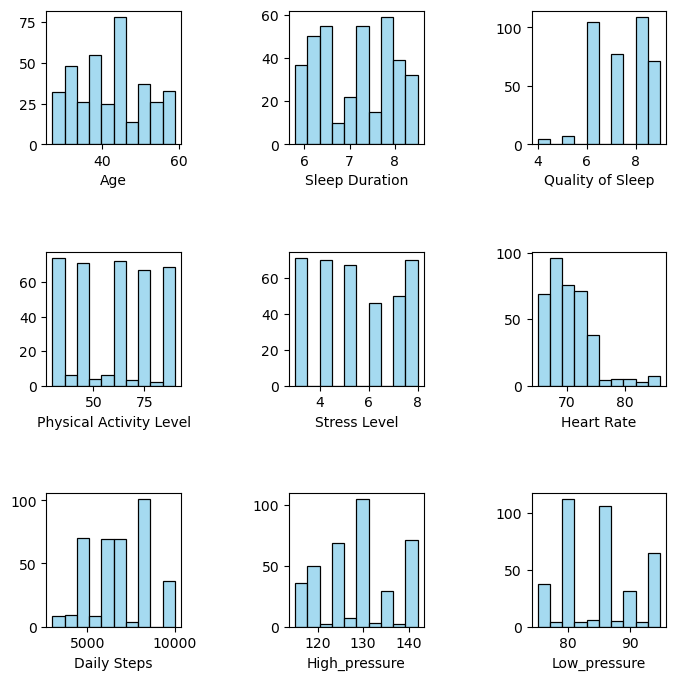

In [15]:

fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "High_pressure", "Low_pressure"]

for i, cat in enumerate(numeric):
    sns.histplot(df[cat], bins=10, color='skyblue', ax=axs[int(i/3), i%3]).set_ylabel("")    

plt.show()

Analysis
Quality of Sleep: Appears to be somewhat exponentially distributed, skewed towards higher values.
Age: Appears to be somewhat normally distributed, no outliers observed.
Sleep Duration: Uniformly distributed.
Physical Activity Level: Uniformly distributed.
Stress Level: The distribution is skewed towards high stress levels.
Heart Rate: Appears to be exponentially distributed, skewed towards lower heart rates.
Daily Steps: Appears somewhat normally distributed within the dataset.
High Pressure: Appears somewhat normally distributed but could conform to another type of distribution.
Low Pressure: Also appears somewhat normally distributed. Interestingly, the distribution between high and low pressure is not identical.
There are peculiarities with the quality of sleep, stress level, and physical activity level where they seem to be spaced out (possibly due to issues with the questions asked). The same sporadic pattern is observed in blood pressure and steps, which needs further explanation, it will likely provide problem confirming any distributions. No apparent outliers can be detected in the data, and the data appears to be already cleaned. All parameters seem intuitively related to sleep quality. No parameter can be discarded, and hence a subsequent analysis of their statistical relevance is warranted.

### Categorical

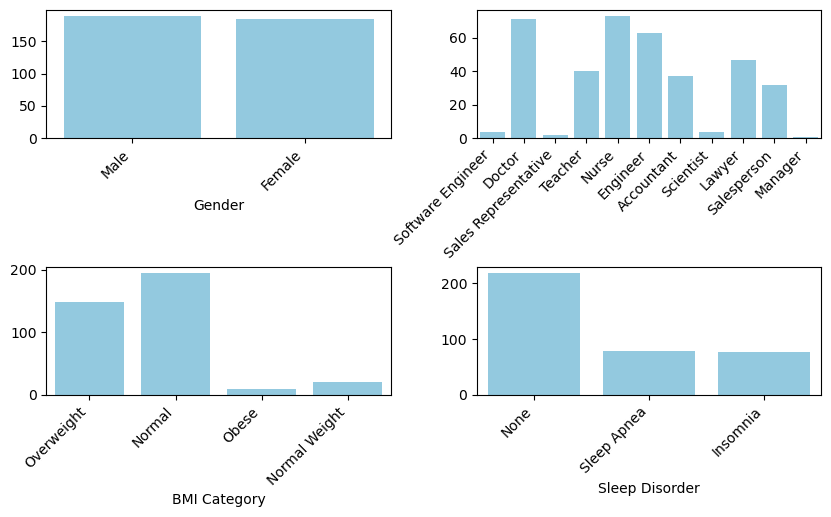

In [16]:
categorical = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

fig, axs = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.25, hspace=1)

for i, cat in enumerate(categorical):
    sns.countplot(x=cat, data=df, color='skyblue', ax=axs[int(i/2), i%2]).set_ylabel("") 
    plt.xticks(rotation=45) 

for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
#plt.tight_layout()
plt.show()

Parameters and Analysis
Gender (binary-class): Displays an even distribution and could influence sleep.
Occupation (multi-class): Certain occupations do not have sufficient representation to draw any conclusions. One possible approach is to remove all occupations with a count lower than 20 and replace them with an "unknown" class.
BMI Category (multi-class): There's a balanced distribution between overweight and normal categories. "Normal Weight" appears to be a typo, which will be reclassified as "Normal", and we will add "Obese" to the "Overweight" category because lack of samples.
Sleep Disorder (multi-class): The distribution is evenly split between individuals with and without sleep disorders, though the disorders themselves are divided between sleep apnea and insomnia. This might be a potential response variable.
Transforming Categorical Parameters
Simplify the BMI by combining the "Normal Weight" category with "Normal". Furthermore, we'll incorporate "Obese" into the "Overweight" category, since these categories are likely closely related and a classification with about 5 values might risk overfitting.
For the occupation category, we'll streamline by removing classes with fewer than 20 instances and merging them into a new class. It's crucial to note that this class won't serve as a baseline as it inherently carries a bias based on the original classes.

In [17]:
## Changing the Normal weight to Normal

df.loc[df["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"
df.loc[df["BMI Category"] == "Obese", "BMI Category"] = "Overweight"

print("Successfully changed all the 'Normal Weight' to 'Normal'")

Successfully changed all the 'Normal Weight' to 'Normal'


In [18]:
## Simplifying occupation

cut_off = 20
new_label = "Unknown"

# Get the value counts
count_data = df['Occupation'].value_counts()
to_replace = count_data[count_data < cut_off].index

# Replace the labels
df['Occupation'] = df['Occupation'].replace(to_replace, new_label)

print(f"Successfully changed all occupation below {cut_off} to {new_label}")

Successfully changed all occupation below 20 to Unknown


<Axes: >

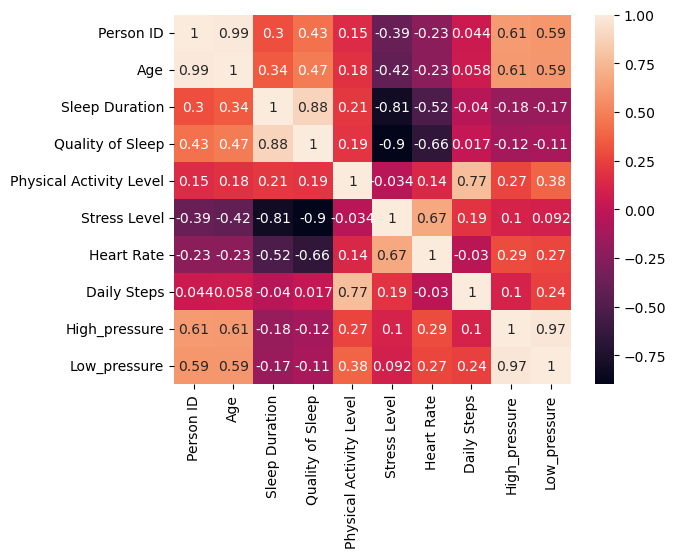

In [19]:
## Find correlation matrix

sns.heatmap(df.corr(numeric_only=True), annot=True)

The correlation matrix provides some interesting insights.

Stress level and sleep duration show a strong correlation, as do stress level and sleep quality.
High and low blood pressure are extremely correlated. I will proceed with low_pressure. The use of the harmonic mean might produce a better parameter.